## 차원축소
* 주로 행렬분해를 통해 특성을 추출하는 방법
* 주성분 분석(PCA, Principal Component Analysis)
* 특이값 분해(

## 차원 축소(Dimensionality Reduction)을 해야하는 이유
* 저차원에서는 일어나지 않는 현상들이 고차원에서 데이터를 분석하거나 다룰 때 일어나는 현상.
* 고차원으로 올라갈수록 공간의 크기가 증가
* 데이터는 해당 공간에 한정적으로 위치되어 빈 공간이 많아지기 때문에 발생
* 데이터의 차원이 너무 큰 경우에는 필요없는 변수를 제거하고, 과적합을 방지하기 위해 데이터의 차원을 축소합니다. 

In [1]:
import numpy as np
fruits = np.load('fruits_300_data')
fruits_2d = fruits.reshape(-1, 100*100)     # 행은 상관없이 열을 100*100=10000 으로 한다.

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)     # 주성분 50개
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
    n = len(arr)     # n은 샘플 개수입니다.
    # 한 줄에 10개씩 이지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다. 
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개 입니다. 
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:     # n 개까지만 그립니다. 
                axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
            axs[i,j].axis('off')
    plt.show()

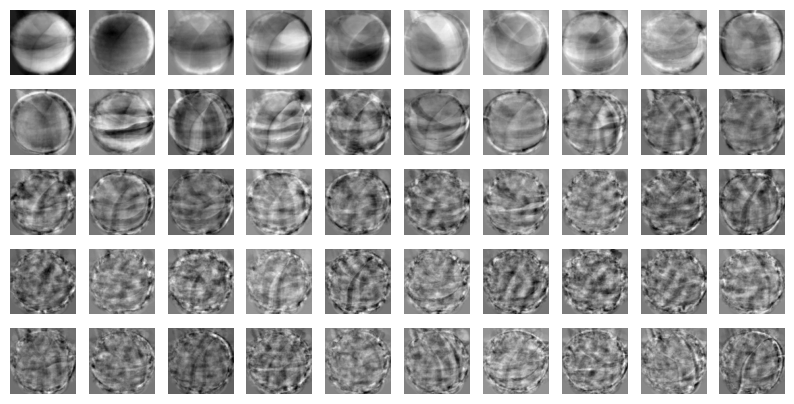

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))     
# 100*100을 주성분 50으로 바꾸고 다시 100*100으로(복원)바꿨더니 아래와 같이 나타난다.

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
# transform 메서드로 변환했더니 10000(100*100)개의 특성이 50개로 줄어듬
fruits_pca = pca.transform(fruits_2d)

In [10]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [11]:
# (300, 500) 줄인 특성을 inverse_transform 으로 다시 복원
# 줄인 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문에 복원이 잘 된다.
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

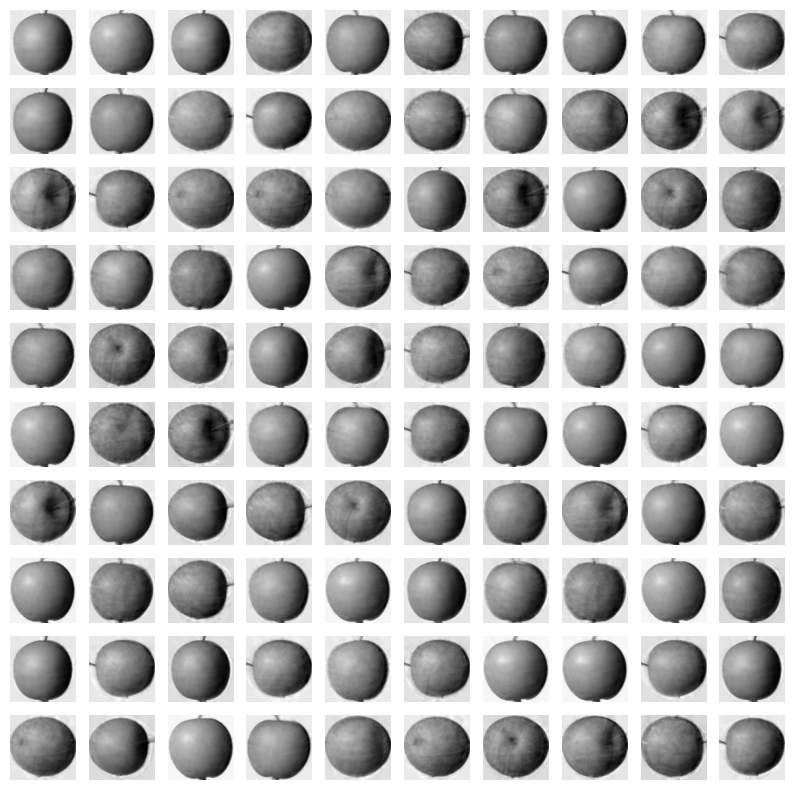

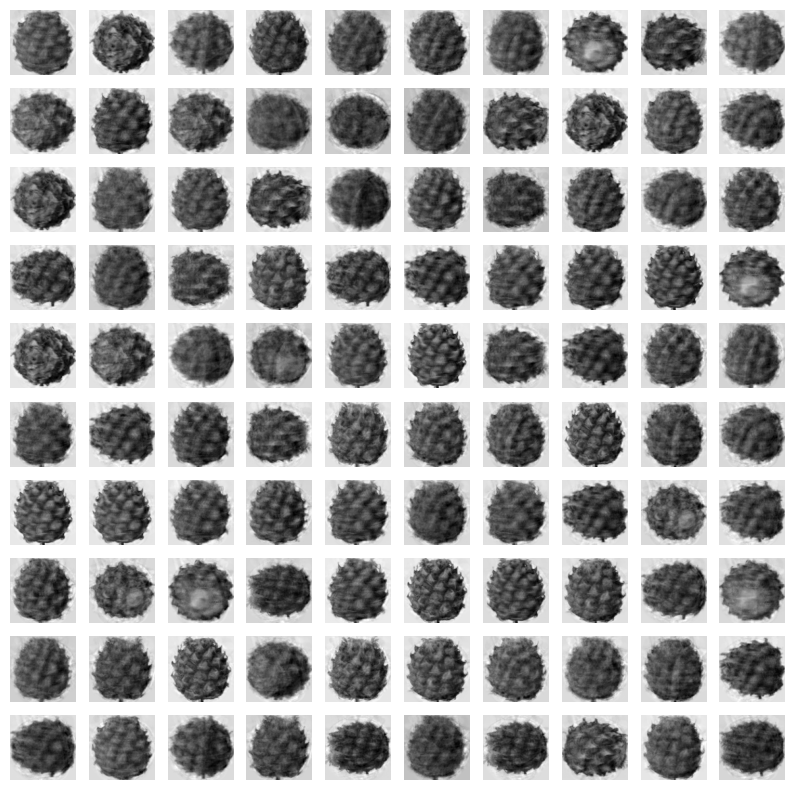

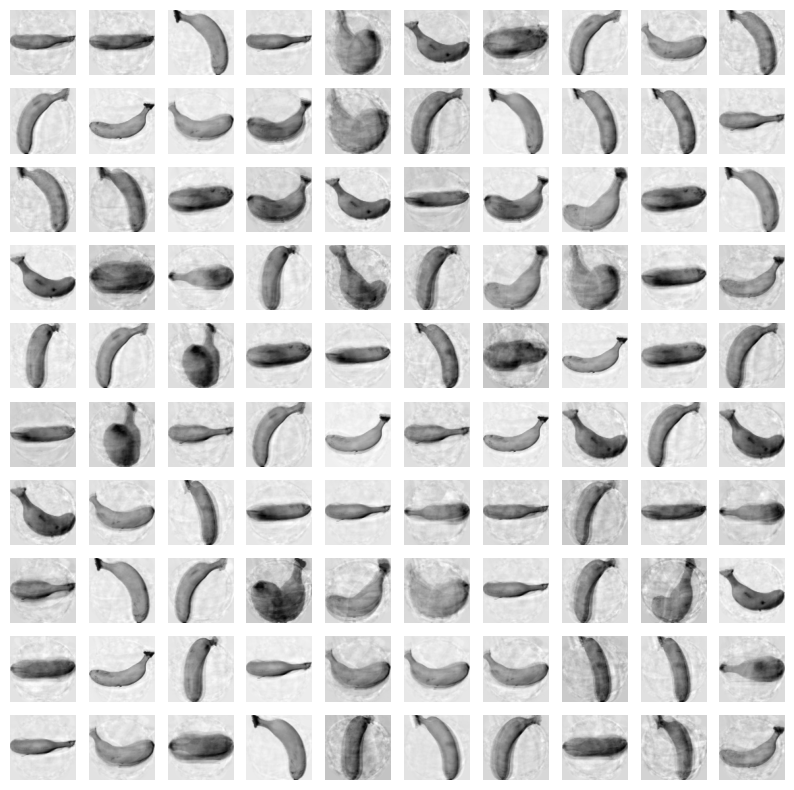

In [13]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

#### 여기까지 한 것.
* (300, 10,000) ==== PCA ====> (300, 50) ==== 복원(PCA), 재구성 ====> (300, 10,000)
* PCA 했다가 복원해도 알아볼 수 있다. 
* PCA자체가 내가 가지고 있는 데이터를 가장 잘 나타낼 수 있는 값들을 뽑기 때문

## 설명된 분산

In [14]:
# 주성분(50개가 어느정도로 분산을 잘 설명했는지 92%)

print(np.sum(pca.explained_variance_ratio_))

0.9215251290166581


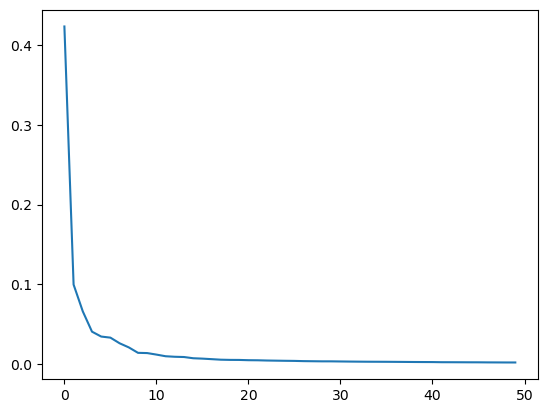

In [15]:
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 함께 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
# 사과, 파인애플, 바나나
target = np.array([0]*100 + [1]*100 + [2] *100)

In [18]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# fruits_2d - 10000
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6868117332458497


In [23]:
# fruits_pca 차원축소 - 시간이 약 42배 줄어들었다. 
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))     

1.0
0.016310358047485353


In [24]:
# {fruits_2d의 np.mean(scores['fit_time'])} / { fruits_pca의 np.mean(scores['fit_time'])}   # 훈련시간이 차원축소해서 42배 줄어들었다.
0.6868117332458497/0.016310358047485353

42.10893048738061

In [25]:
# 주성분 개수 대신 0.5 실수를 넣어도 된다. 
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [26]:
print(pca.n_components_)

2


In [27]:
# 샘플 300개, 주성분 2개
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [28]:
# 성분 2개만 사용했는데도 99.3% 정확도가 나온다.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.022804641723632814


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [29]:
# 차원이 축소된 데이터를 이용해서 KMeans 알고리즘을 사용
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_pca)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [30]:
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


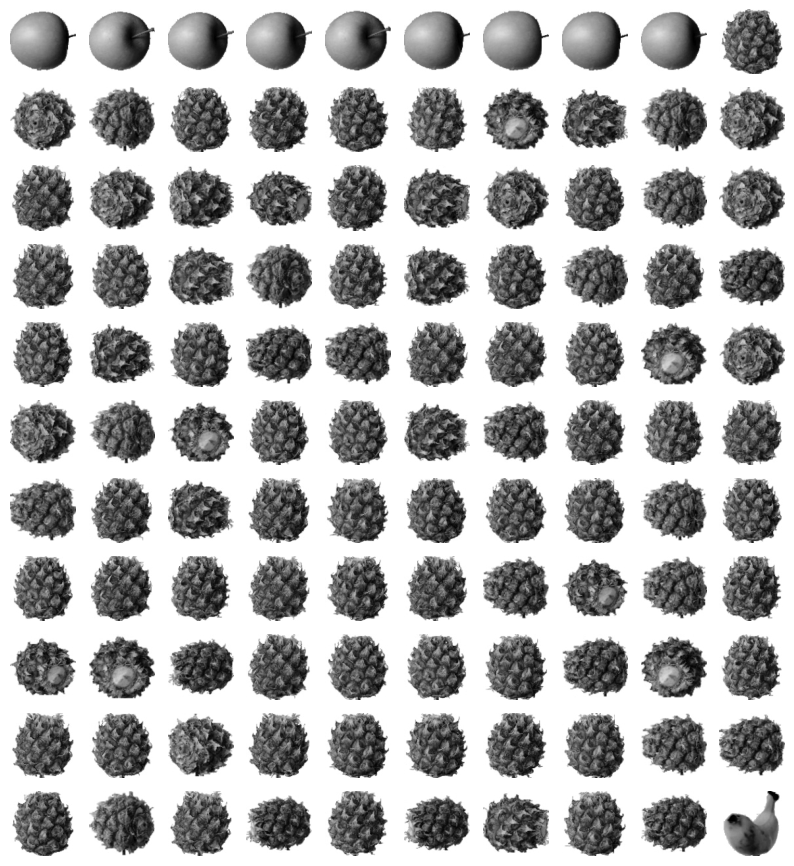

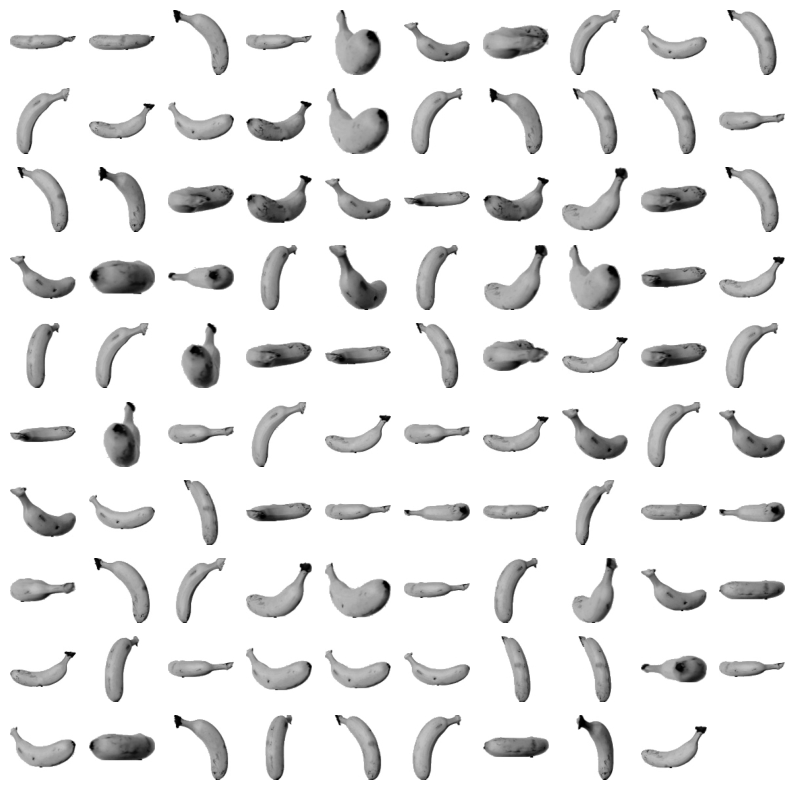

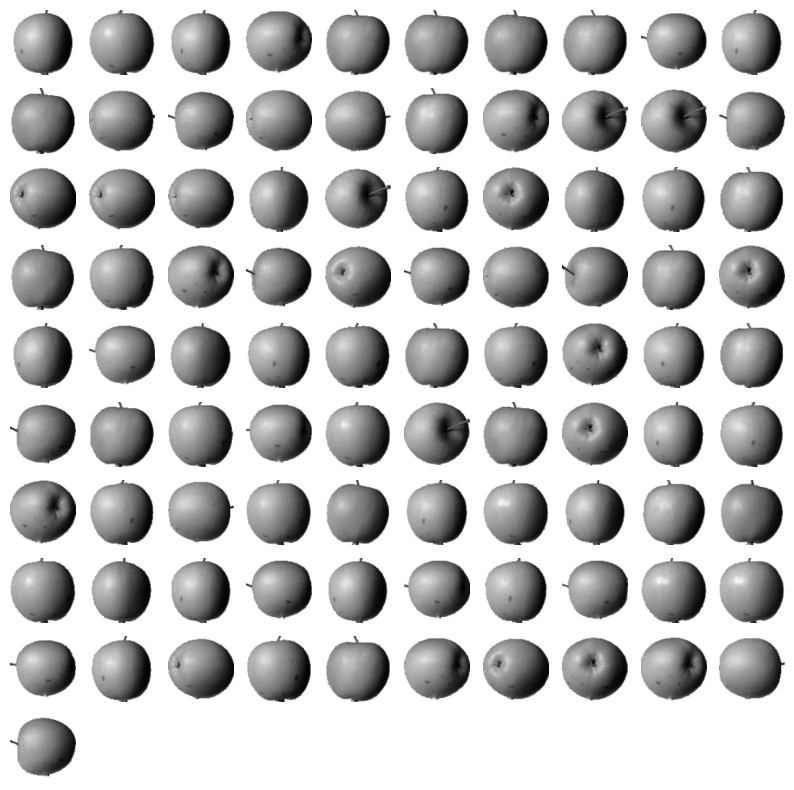

In [31]:
# 바나나는 잘 구분, 사과와 파인애플은 잘 구분하지 못한다
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

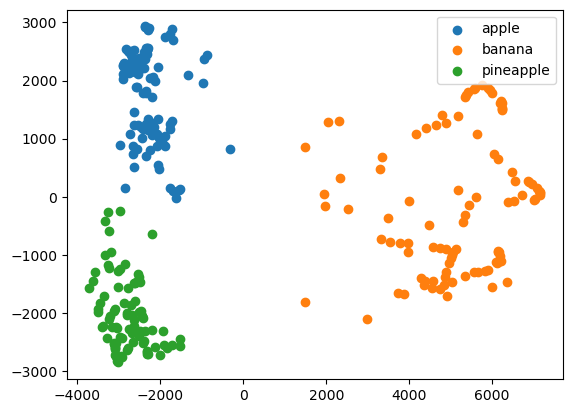

In [32]:
# fruits_pca - 2개 주성분 시각화
for label in range(0,3):
    data = fruits_pca[km.labels_ == label ]
    plt.scatter(data[:,0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()